# This file contains the code for the Random Forest training process

## Imports

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Read data from file that contains binary class
### NOTE: The train_binary.csv file was processing using AddBinaryClassColumn.py

In [42]:
df = pd.read_csv('data/train_binary.csv')

## Check data columns

In [43]:
df.columns

Index(['ID', 'flow_duration', 'Header_Length', 'Protocol type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'Label',
       'Binary Class'],
      dtype='object')

In [44]:
len(df.columns)

49

In [45]:
df.shape

(1950138, 49)

## Delete Label column

In [46]:
df = df.drop(columns=['ID', 'Label'])

In [47]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight',
       'Binary Class'],
      dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Binary Class'] = encoder.fit_transform(df['Binary Class'])

In [49]:
df['Binary Class'].value_counts()

Binary Class
0    1866053
1      84085
Name: count, dtype: int64

In [50]:
df['Binary Class'].unique()

array([0, 1])

## Get train data and output labels

In [51]:
X = df.drop(columns=['Binary Class'])
y = df['Binary Class']

## Feature scaling

In [52]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X = scaler.fit_transform(X)

## Split data into training and testing sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Random Forest model

In [54]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Feature importance 

In [60]:
rf_importances = model.feature_importances_

In [61]:
sorted_indices_rf = rf_importances.argsort()[::-1]

In [62]:
top_25_indices_rf = sorted_indices_rf[:25]

In [64]:
feature_names = X_df.columns
top_25_features_rf = [feature_names[i] for i in top_25_indices_rf]

# Print the top 25 feature names from Random Forest
print("Top 25 features from Random Forest:")
for feature in top_25_features_rf:
    print(feature)

Top 25 features from Random Forest:
IAT
rst_count
flow_duration
urg_count
Header_Length
Srate
Rate
Duration
HTTPS
Max
Radius
Tot size
Std
Tot sum
AVG
Covariance
syn_count
Magnitue
Min
Number
Weight
Protocol type
Variance
ack_count
ack_flag_number


In [65]:
score_rf = pd.DataFrame({
    'Feature': feature_names,
    'RF Importance': rf_importances
})

score_rf = score_rf.sort_values(by='RF Importance', ascending=False)

top_25_features_rf = score_rf.head(25)
top_25_features_rf

,Feature,RF Importance
39,IAT,0
18,rst_count,0
0,flow_duration,0
17,urg_count,0
1,Header_Length,0
5,Srate,0
4,Rate,0
3,Duration,0
20,HTTPS,0
35,Max,0


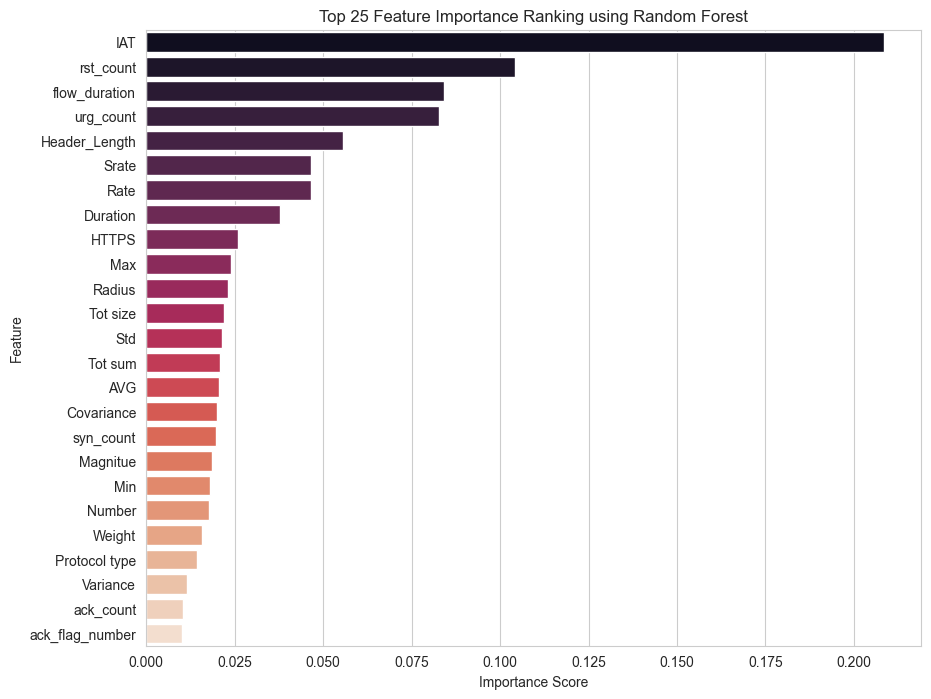

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

top_25 = top_25_features_rf.sort_values(by='RF Importance', ascending=False)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.barplot(x='RF Importance', y='Feature', data=top_25, palette='rocket', hue='Feature')

plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 25 Feature Importance Ranking using Random Forest')

plt.show()

In [68]:
unselected_rf = score_rf[~score_rf['Feature'].isin(top_25_features_rf['Feature'])]
unselected_rf_array = unselected_rf['Feature'].values
unselected_rf_array

array(['fin_count', 'HTTP', 'psh_flag_number', 'TCP', 'UDP',
       'syn_flag_number', 'DNS', 'rst_flag_number', 'SSH', 'LLC', 'ARP',
       'IPv', 'ICMP', 'fin_flag_number', 'cwr_flag_number',
       'ece_flag_number', 'Telnet', 'DHCP', 'Drate', 'IRC', 'SMTP'],
      dtype=object)